In [61]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import stats

In [3]:
df = pd.read_csv('FICO_data.csv') #creating a data frame using pandas
df = df[(df.FICO_V30A_QUEST_SCORE_VALUE <= 850) & (df.VANTAGE_V3_SCORE > 200)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169383 entries, 0 to 174895
Data columns (total 8 columns):
RECORD_NB                      169383 non-null int64
ACCT_STATUS                    165452 non-null object
ACCT_TYPE                      169383 non-null object
STATE_CD                       169382 non-null object
CITY_NAME                      169377 non-null object
ZIP_CD                         169383 non-null int64
VANTAGE_V3_SCORE               169383 non-null int64
FICO_V30A_QUEST_SCORE_VALUE    169383 non-null int64
dtypes: int64(4), object(4)
memory usage: 11.6+ MB


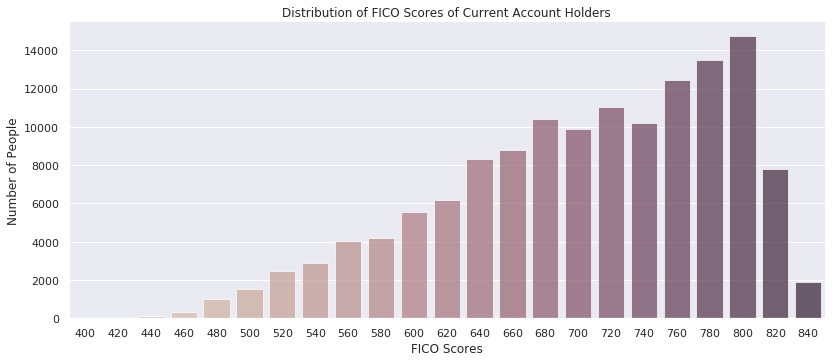

In [4]:
def twenty_round(x, base=20):
    return base * round(x/base)

df_count = pd.DataFrame({'FICO Scores' : df[df.ACCT_STATUS=='CURR ACCT']['FICO_V30A_QUEST_SCORE_VALUE'].apply(twenty_round)})
ax = sns.catplot(x='FICO Scores', kind='count', palette='ch:.25', data=df_count, alpha=0.7, aspect=2.3)
ax.set(title='Distribution of FICO Scores of Current Account Holders', ylabel='Number of People')

In [5]:
acct_dict = {
    "CURR ACCT": "Open Account",
    "PAID SATIS": "Paid Account/Zero Balance",
    "CUR WAS 30": "Current account/was 30 days past due date",
    "CUR WAS 30-2": "Current account/was 30 days past due date 2 times",
    "CUR WAS 30-3": "Current account/was 30 days past due date 3 times",
    "CUR WAS 30-4": "Current account/was 30 days past due date 4 times",
    "CUR WAS 30-5": "Current account/was 30 days past due date 5 times",
    "CUR WAS 30-6+": "Current account/was 30 days past due date 6+ times",
    "CHARGOFF": "Unpaid balance reported as a loss by the credit grantor"
}

df_scores = df[['VANTAGE_V3_SCORE', 'FICO_V30A_QUEST_SCORE_VALUE', 'ACCT_STATUS']]
df_scores = df_scores[df_scores.ACCT_STATUS.isin(acct_dict.keys())]
df_scores = (df_scores.rename(columns={'VANTAGE_V3_SCORE': 'Vantage Score', 'FICO_V30A_QUEST_SCORE_VALUE': 'FICO Score'})
            .replace(acct_dict))

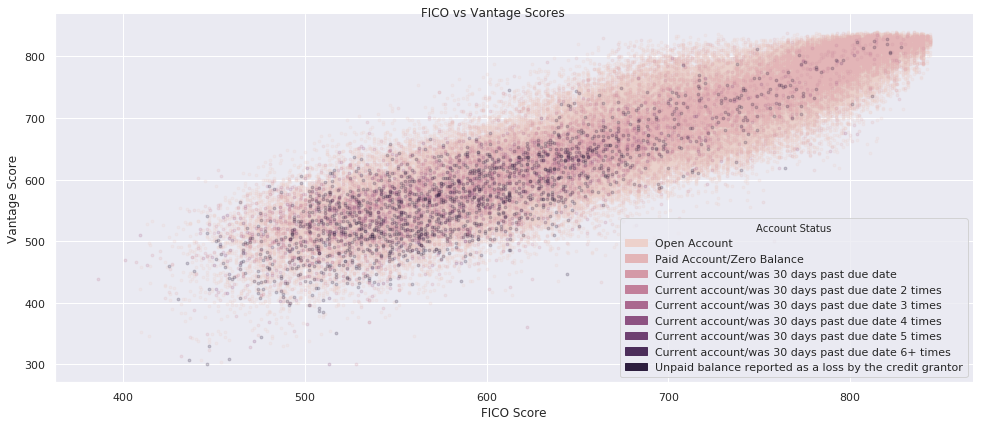

In [6]:
fg = sns.FacetGrid(data=df_scores, hue='ACCT_STATUS', hue_order=acct_dict.values(), palette=sns.cubehelix_palette(9),height=6, aspect=2.3)
g = fg.map(plt.scatter, 'FICO Score', 'Vantage Score', alpha=0.2, s=8)
g.fig.suptitle("FICO vs Vantage Scores")

labels = acct_dict.values()
colors = sns.cubehelix_palette(9).as_hex()
handles = [patches.Patch(color=col, label=lab) for col, lab in zip(colors, labels)]

plt.legend(handles=handles, title='Account Status');
#df_scores.loc[df.ACCT_STATUS.isin(acct_dict.keys())].plot.scatter(x='VANTAGE_V3_SCORE', y='FICO_V30A_QUEST_SCORE_VALUE', s=0.05, figsize=(15,11))

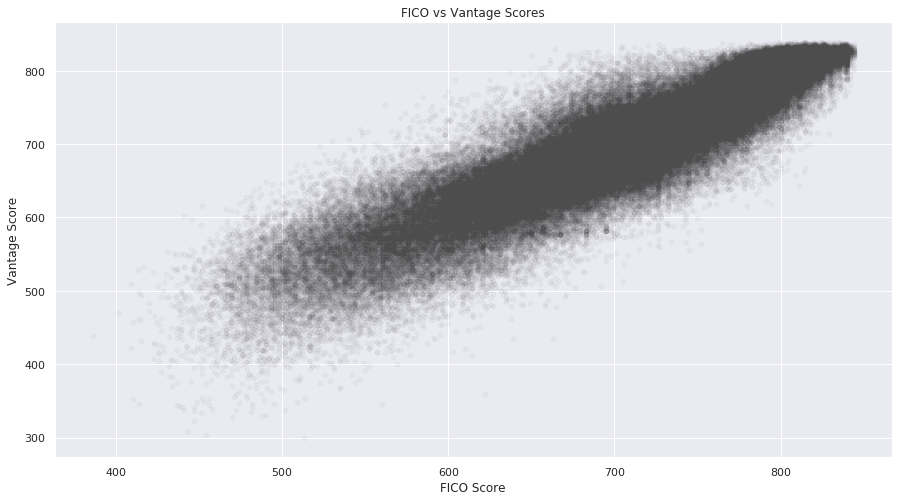

In [59]:
df_scores[['Vantage Score', 'FICO Score']].plot.scatter(x='FICO Score', y='Vantage Score', figsize = (15,8), c='.3', alpha=0.04, title='FICO vs Vantage Scores')

In [29]:
colors[3]

'#c27f9a'

Text(0.5, 0.98, 'FICO vs Vantage Scores')

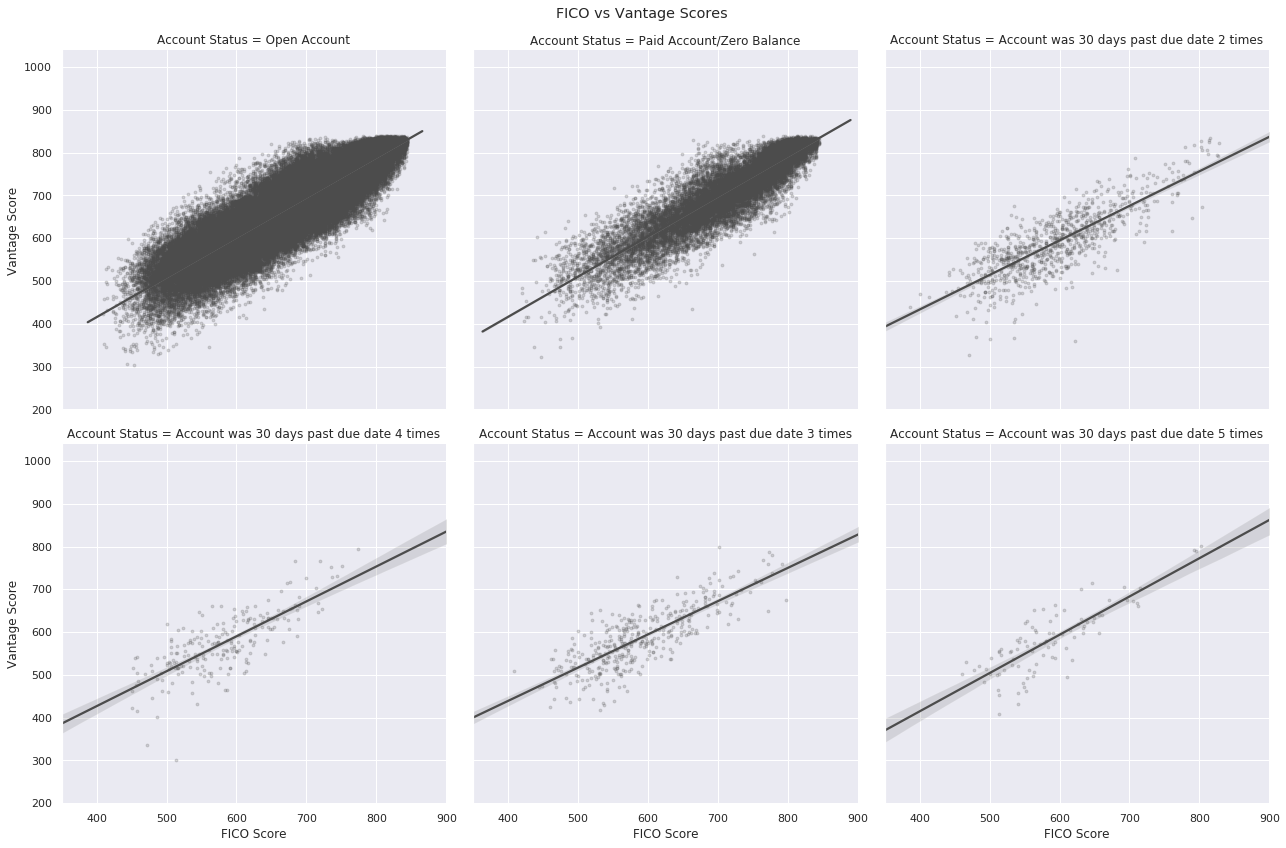

In [72]:
acct_dict = {
    "CURR ACCT": "Open Account",
    "PAID SATIS": "Paid Account/Zero Balance",
    "CUR WAS 30-2": "Account was 30 days past due date 2 times",
    "CUR WAS 30-3": "Account was 30 days past due date 3 times",
    "CUR WAS 30-4": "Account was 30 days past due date 4 times",
    "CUR WAS 30-5": "Account was 30 days past due date 5 times",
}

df_scores = df[['VANTAGE_V3_SCORE', 'FICO_V30A_QUEST_SCORE_VALUE', 'ACCT_STATUS']]
df_scores = df_scores[df_scores.ACCT_STATUS.isin(acct_dict.keys())]
df_scores = (df_scores.rename(columns={
    'VANTAGE_V3_SCORE': 'Vantage Score',
    'FICO_V30A_QUEST_SCORE_VALUE': 'FICO Score',
    'ACCT_STATUS': "Account Status"
})
            .replace(acct_dict))

fg = sns.FacetGrid(data=df_scores, height=6, aspect=1, col='Account Status', col_wrap=3)
g = fg.map(sns.regplot, 'FICO Score', 'Vantage Score', color=".3", scatter_kws={'s':8, 'alpha':0.2})
plt.subplots_adjust(top=0.93)
plt.xlim(350,900)
g.fig.suptitle("FICO vs Vantage Scores")
#df_scores.loc[df.ACCT_STATUS.isin(acct_dict.keys())].plot.scatter(x='VANTAGE_V3_SCORE', y='FICO_V30A_QUEST_SCORE_VALUE', s=0.05, figsize=(15,11))